# Reproducibility Testing Workshop
v1.1 <br>
2025-06-11 <br>
BCHM 5420 <br>
Rex Asis <br>

## Introduction
This demo will outline the steps taken to take a list of desired contigs from a multi-FASTA file, then split these contigs into single FASTA files, e.g.,

In [ ]:
# Input is a multi fasta file
cat multi.fasta
>contig1 
AGTCAGCATTTACTA
>contig2 
GTCTGTAGCTAGTCAGTCAGT
>contig3 
TAGCTAGATCAG
>contig4 
CGATAGCTAGATGCTAGTAGCTAGCTA

# Select a few FASTA headers or IDs, which get placed in a new fasta file
cat list.fasta
>contig2 
GTCTGTAGCTAGTCAGTCAGT
>contig3 
TAGCTAGATCAG

# Split the new file into individual fasta files
cat list.contig2.fasta
>contig2 
GTCTGTAGCTAGTCAGTCAGT

cat list.contig3.fasta
>contig3 
TAGCTAGATCAG

## Requirements
1. seqkit v2.10.0
2. conda environment: contains seqkit
3. Inputs (see below)

### Input Source
1. FASTA (.fasta) file(s) containing the multiple contigs (134-newheader.fasta, BFP-newheader.fasta, M4-newheader.fasta) <br>

The assembly files (.fna) were obtained from GenBank, with assembly accession numbers GCA_003231325.2 (Ptr134), GCF_003171515.1 (M4), and GCA_000149985.1 (BFP). These files contain all the contigs associated with the respective Ptr isolates, and their IDs/FASTA Headers were altered for ease of reading (format: accession_isolate_chromosome#_contigname). Finally, file names were also changed to shorten them and extension changed from .fna to .fasta (format: isolate-newheader.fasta).

2. Text (.txt) file containing list of contigs that needs to be extracted from the fasta file (region3.txt) <br>

After performing pairwise whole genome alignments with nf-core/pairgenome align (e.g., Figure 1), the contigs associated with the gaps were added to a text file, using the exact ID/FASTA header of the contigs.

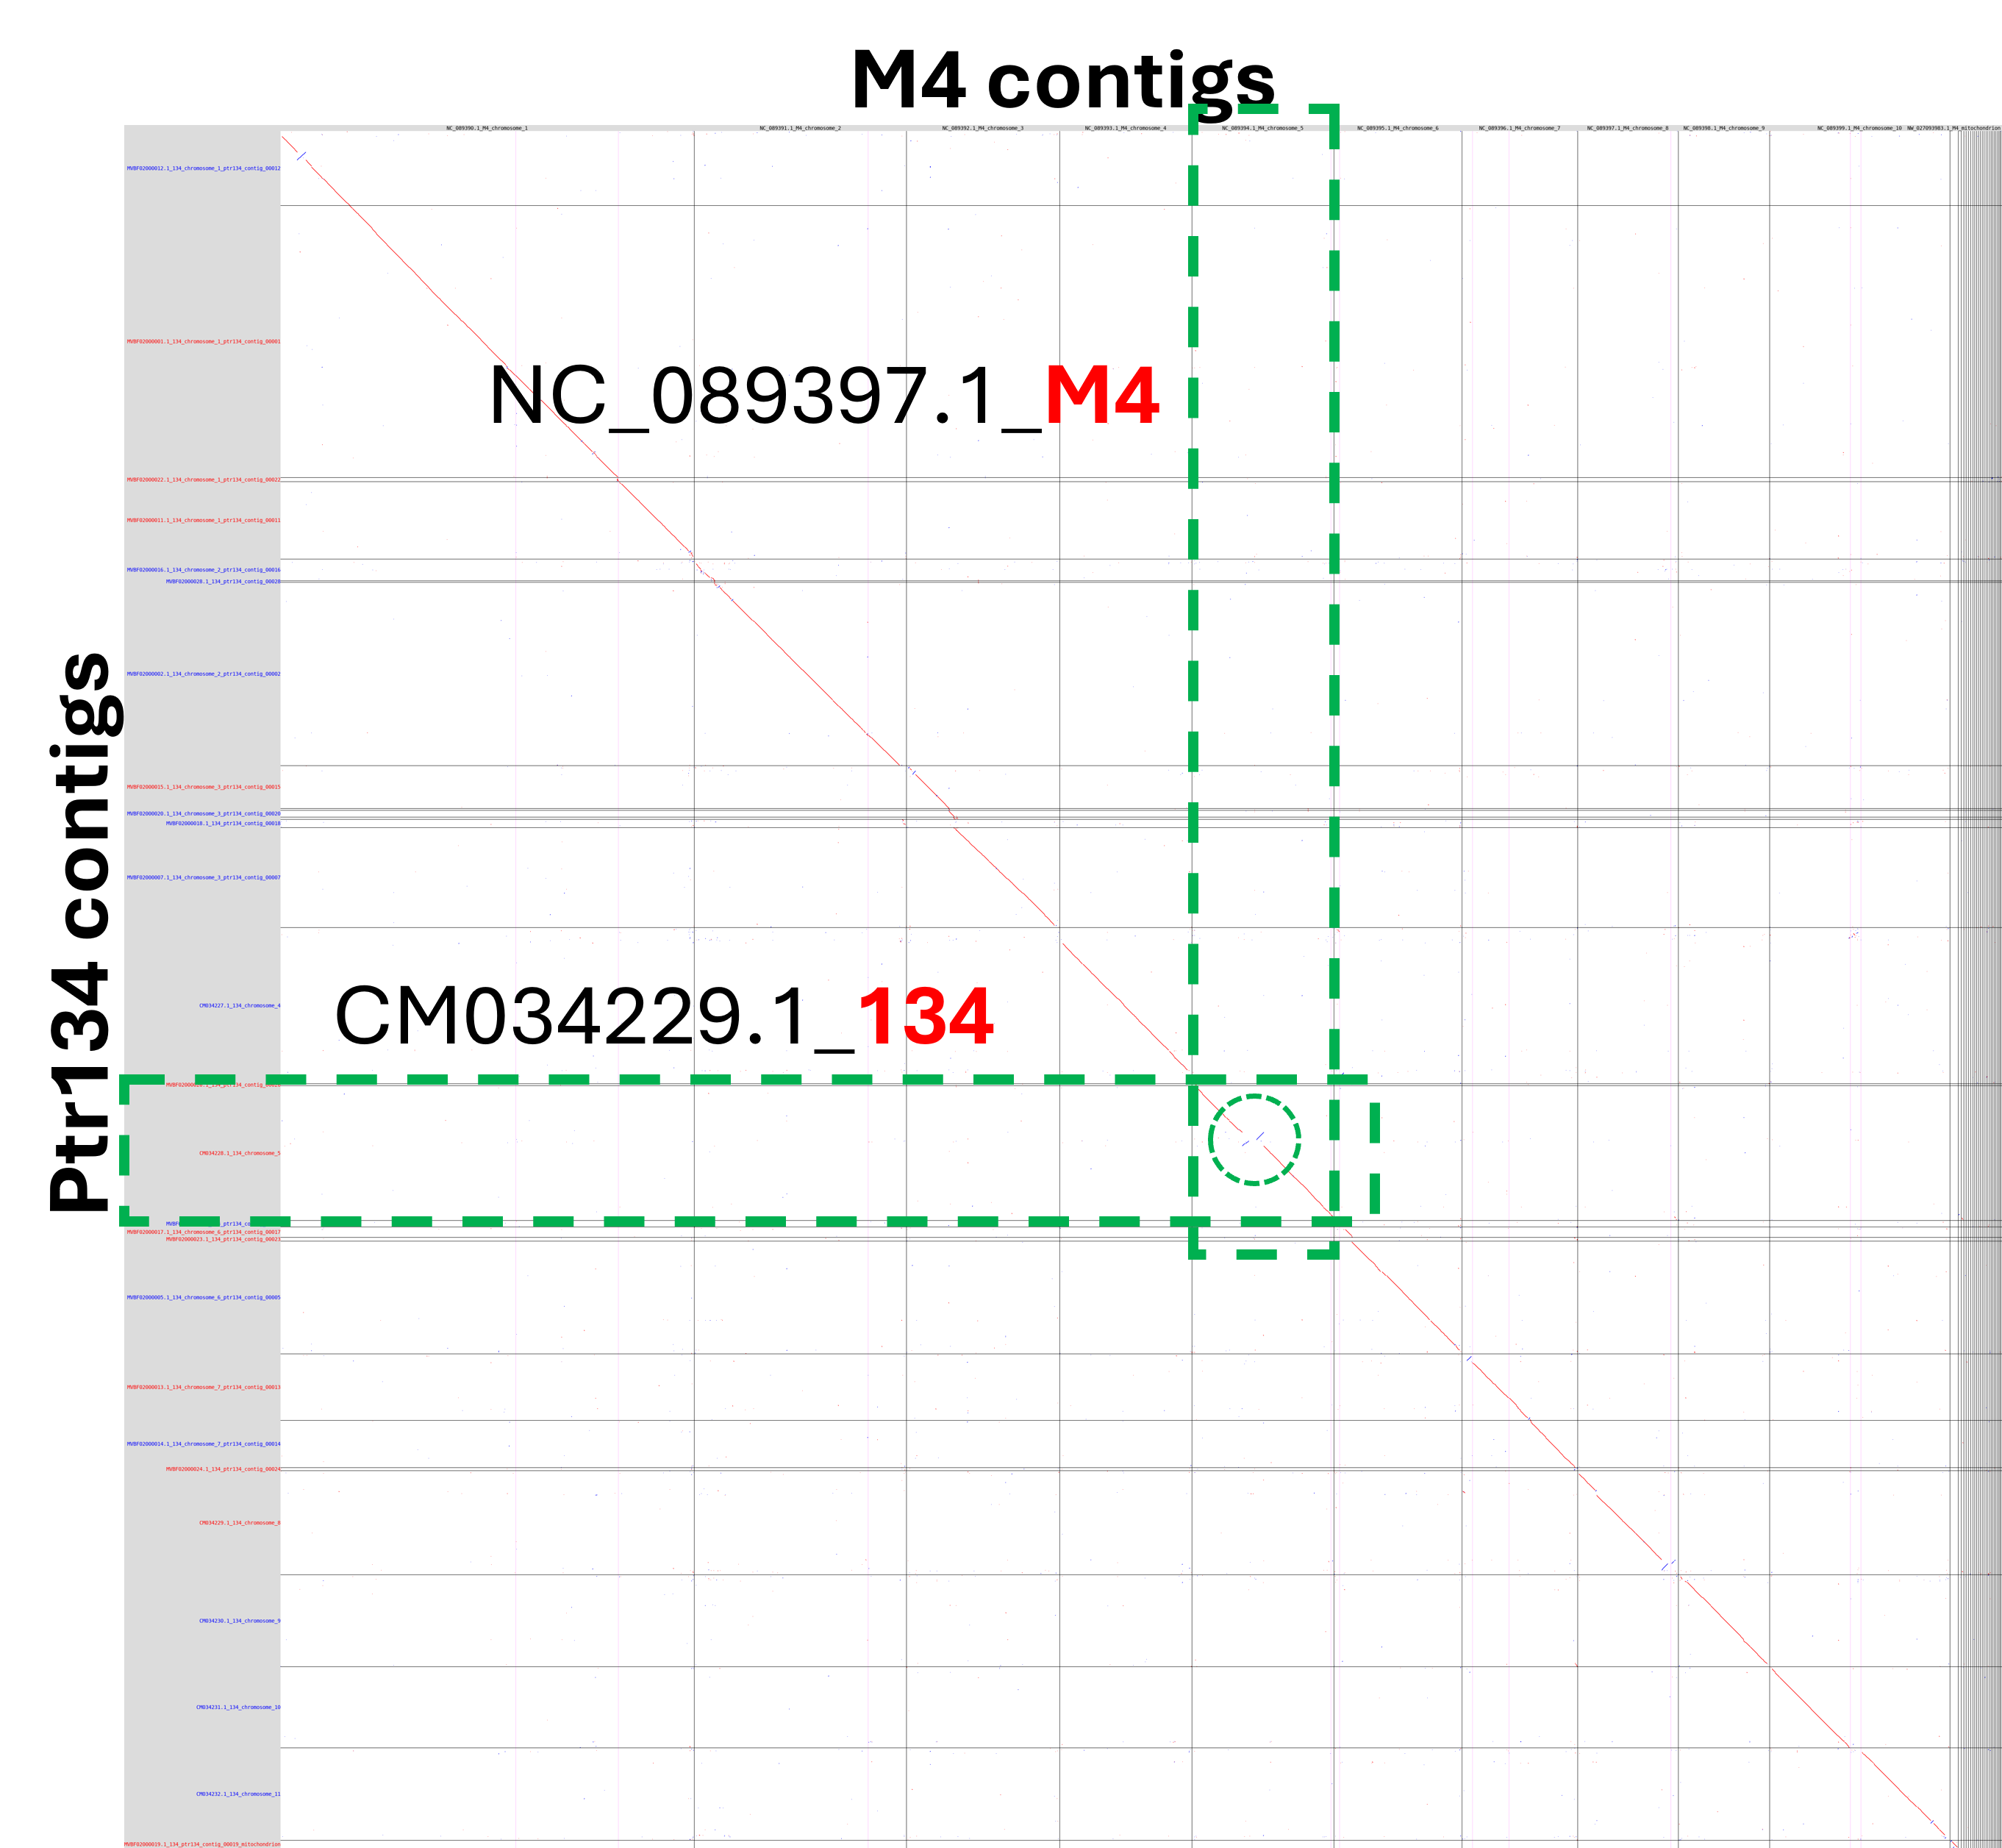
**Figure 1**: Whole genome alignment between Ptr134 and M4. Highlighted in the green circle is a gap in alignment of the two isolates. The green boxes represent the respective contigs in each isolate that is associated with this gap.

3. (optional, but convenient) custom bash script that combines two commands together (seqkit-extract-v2025.06.08.sh). We will be using this script for this demo.

## Steps
All commands will be ran in bash.

In [ ]:
#!/bin/bash

1. Clone GitHub repository, which I made for the purposes of this demo: https://github.com/rex-asis/BCHM5420-project-demo# <br>
 (My project repository may take a bit longer to clone, so opted to make a smaller one instead)

In [ ]:
git clone git@github.com:rex-asis/BCHM5420-project-demo.git

The home directory is called **BCHM-5420-project-demo**. It will contain two directories: _inputs_ and _scripts_. Each directories also contain the files that we will need to run for this demo.

2. Setup conda environment. I use mamba, but conda (likely micromamba as well) will work. No docker though :(

In [ ]:
#!/bin/bash
# Install 'seqkit' tool from anaconda: https://anaconda.org/bioconda/seqkit
mamba create -n seqkit
mamba activate seqkit
mamba install -c bioconda seqkit

3. If we change directories to _inputs_, we will see 3 .fasta files. We need to combine this into 1 file using a command:

In [ ]:
cd /your/path/info/BCHM5420-project-demo/inputs
cat *.fasta > ptr-genomes.fasta

**Side Note**: I would have provided the combined file to you but it's too big for git!

4. Let's move back to the project's home directory and create a new set of directories. This is where the output of the main command will be deposited:

In [ ]:
cd /your/path/info/BCHM5420-project-demo/ # OR
cd ..
mkdir -p outputs/seqkit # makes a directory called 'outputs', then another directory within 'outputs', called seqkit 

5. Checking that we're still in the project's home directory, we can now run our main command:

In [ ]:
bash scripts/seqkit-extract-v2025.06.08.sh region3

## Expected Outcome
Running this command will provide a few different outputs:
1. region3.fasta: Multi FASTA file containing only the list of FASTA headers selected

In [ ]:
cd /your/path/info/BCHM5420-project-demo/outputs/seqkit
ls

2. region3.fasta.split: This is a directory, which contains single FASTA files that came from splitting the multi FASTA file from above

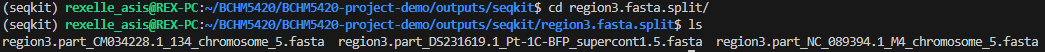

## Breaking Down The Command
The command we ran relies on a custom bash script, **seqkit-extract-v2025.06.08.sh**, which looks like this:

In [ ]:
### 2025-06-08 Rex Asis
### seqkit-extract-v2025.06.08.sh
### This script will extract a list of FASTA headers from a multi-FASTA file, then generate individual single FASTA files

## Inputs required
# 1. Multi FASTA file
# 2. A text file containing the list of single FASTA sequences that want to be extracted.

# cd ~/BCHM5420/BCHM5420_class_project
# bash scripts/seqkit-extract.sh $1
seqkit grep -f inputs/seqkit/$1.txt inputs/ptr-genomes.fasta -o outputs/seqkit/$1.fasta
seqkit split outputs/seqkit/$1.fasta -i

Let's breakdown these commands.

1. **(Optional - can skip to '2.' for the sake of time, but feel free to look through later)** The first thing you will notice is the following symbol:

In [ ]:
$1

In Bash script, this is called a variable. It let's us generalize the code so that we can apply it beyond a single file. <br>
Let's take a simpler command for example:

In [ ]:
#!/bin/bash
# Open file and only read first 2 lines
cat multi.fasta | head -2

# output
>contig1 
AGTCAGCATTTACTA

But what if I want to run this command for a different fasta file? I'm lazy, so I don't want to type the same command over and over. <br>
Another way is to write this command in a bash script (called 'open-file.sh'), and generalize the file name to $1: 

In [ ]:
#!/bin/bash
# open-file.sh
cat $1.fasta | head -2

Now we can run the script as follows:

In [ ]:
#!/bin/bash
# Open file called multi.fasta
bash open-file.sh multi

# output
>contig1 
AGTCAGCATTTACTA

This command is telling us to run a bash script, and to replace every $1 with the string 'multi'. <br>
What's nice is that we can use the same script to open another file, e.g., list.fasta, by replacing 'multi' with 'list'

In [ ]:
#!/bin/bash
# Open file called list.fasta
bash open-file.sh list

# output
>contig2 
GTCTGTAGCTAGTCAGTCAGT

2. Now looking closer at each command in the script:

In [ ]:
# Command 1
seqkit grep -f inputs/seqkit/$1.txt inputs/ptr-genomes.fasta -o outputs/seqkit/$1.fasta

seqkit grep # Seach sequences based on ID/name/sequence motifs. We're using it for ID (aka FASTA header) 
    -f inputs/seqkit/$1.txt inputs/ptr-genomes.fasta # Search for the corresponding FASTA headers listed in the .txt file ($1 is a filler) within the fasta file
    -o outputs/seqkit/$1.fasta # Place the output in the folder

The goal of this first command is to search for a provided list sequences within a FASTA file, given the sequence ID. Then, it combines all of those sequences into one file.

In [ ]:
# Command 2
seqkit split outputs/seqkit/$1.fasta -i


seqkit split outputs/seqkit/$1.fasta # Split the given fasta file in a particular way
    -i # Split into invididual sequences

This second command will take the multi FASTA output from above, and split it into individual sequences.

Since this is a bash script, it must to written as follows in order to run:

In [ ]:
#!/bin/bash
bash open-file.sh <name of file without .txt extension>

# e.g., if we want to open a file called region3.txt
bash seqkit-extract-v2025.06.08.sh region3

Rinse and repeat. You can imagine that this script can be used to locate a new set of contigs. The names of these contigs should be added to a new text file, such as 'newcontigs'. With this new file, we just have to replace $1 (aka 'region3' in the demo above) with 'newcontigs'

## Revision History

| Date       | Version | Author        | Description of Update                                      |
|------------|---------|---------------|-------------------------------------------------------------|
| 2025-06-10 | v1.0    | Rex Asis   | Initial draft created with documentation structure.         |
| 2025-06-11 | v1.1    | Rex Asis  | Added requirements and input sources   |